In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from shapwaterfall import shapwaterfall
pd.set_option('display.max_rows', 500)

In [2]:
data=pd.read_csv('train.csv') # Available at https://www.kaggle.com/c/titanic/data

In [5]:
target = data['Survived']

In [3]:
# Creating initials for imputing  Null Values of Age
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')


In [4]:
# Replacing missspelled Initials
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [6]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [7]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [8]:
data['Embarked'].fillna('S',inplace=True)

In [9]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

In [10]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

In [11]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [12]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [13]:
ignore_cols= ['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId','Survived']

In [14]:
sel_cols = [col for col in data.columns if col not in ignore_cols]
sel_cols

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Initial',
 'Age_band',
 'Family_Size',
 'Alone',
 'Fare_cat']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33, random_state=42,stratify=target)

In [17]:
model = RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X_train[sel_cols],y_train)
prediction=model.predict_proba(X_test[sel_cols])
print('Roc-auc score is',metrics.roc_auc_score(y_test,prediction[:,1]))

Roc-auc score is 0.8112904794320723


In [18]:
X_test.iloc[2,:]

PassengerId                                        473
Survived                                             1
Pclass                                               2
Name           West, Mrs. Edwy Arthur (Ada Mary Worth)
Sex                                                  1
Age                                                 33
SibSp                                                1
Parch                                                2
Ticket                                      C.A. 34651
Fare                                             27.75
Cabin                                              NaN
Embarked                                             0
Initial                                              1
Age_band                                             2
Family_Size                                          3
Alone                                                0
Fare_cat                                             2
Name: 472, dtype: object

In [19]:
X_test.iloc[0,:]

PassengerId                          372
Survived                               0
Pclass                                 3
Name           Wiklund, Mr. Jakob Alfred
Sex                                    0
Age                                   18
SibSp                                  1
Parch                                  0
Ticket                           3101267
Fare                              6.4958
Cabin                                NaN
Embarked                               0
Initial                                0
Age_band                               1
Family_Size                            1
Alone                                  0
Fare_cat                               0
Name: 371, dtype: object

In [21]:
X_test.rename(columns={'Name' : 'Reference'},inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


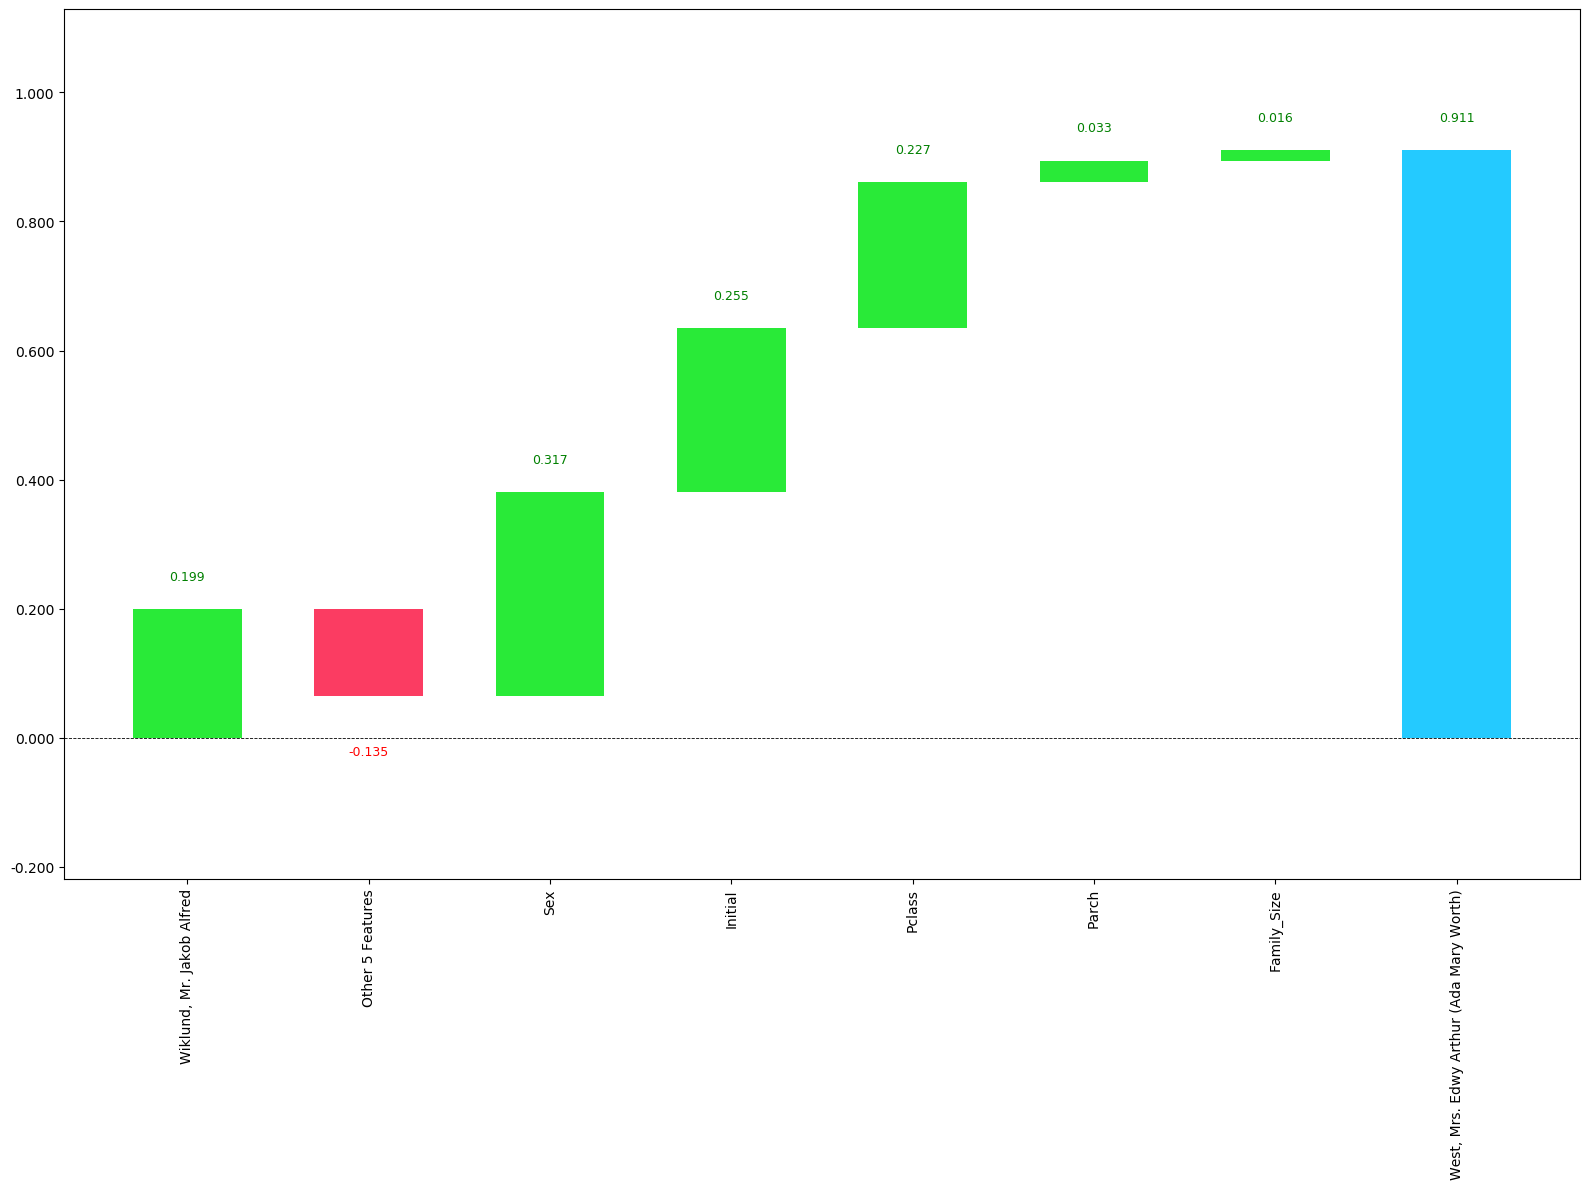

In [24]:
shapwaterfall(model,X_train[sel_cols],X_test[sel_cols+['Reference']],ref1 = 'Wiklund, Mr. Jakob Alfred',ref2 = 'West, Mrs. Edwy Arthur (Ada Mary Worth)', num_feature=5)

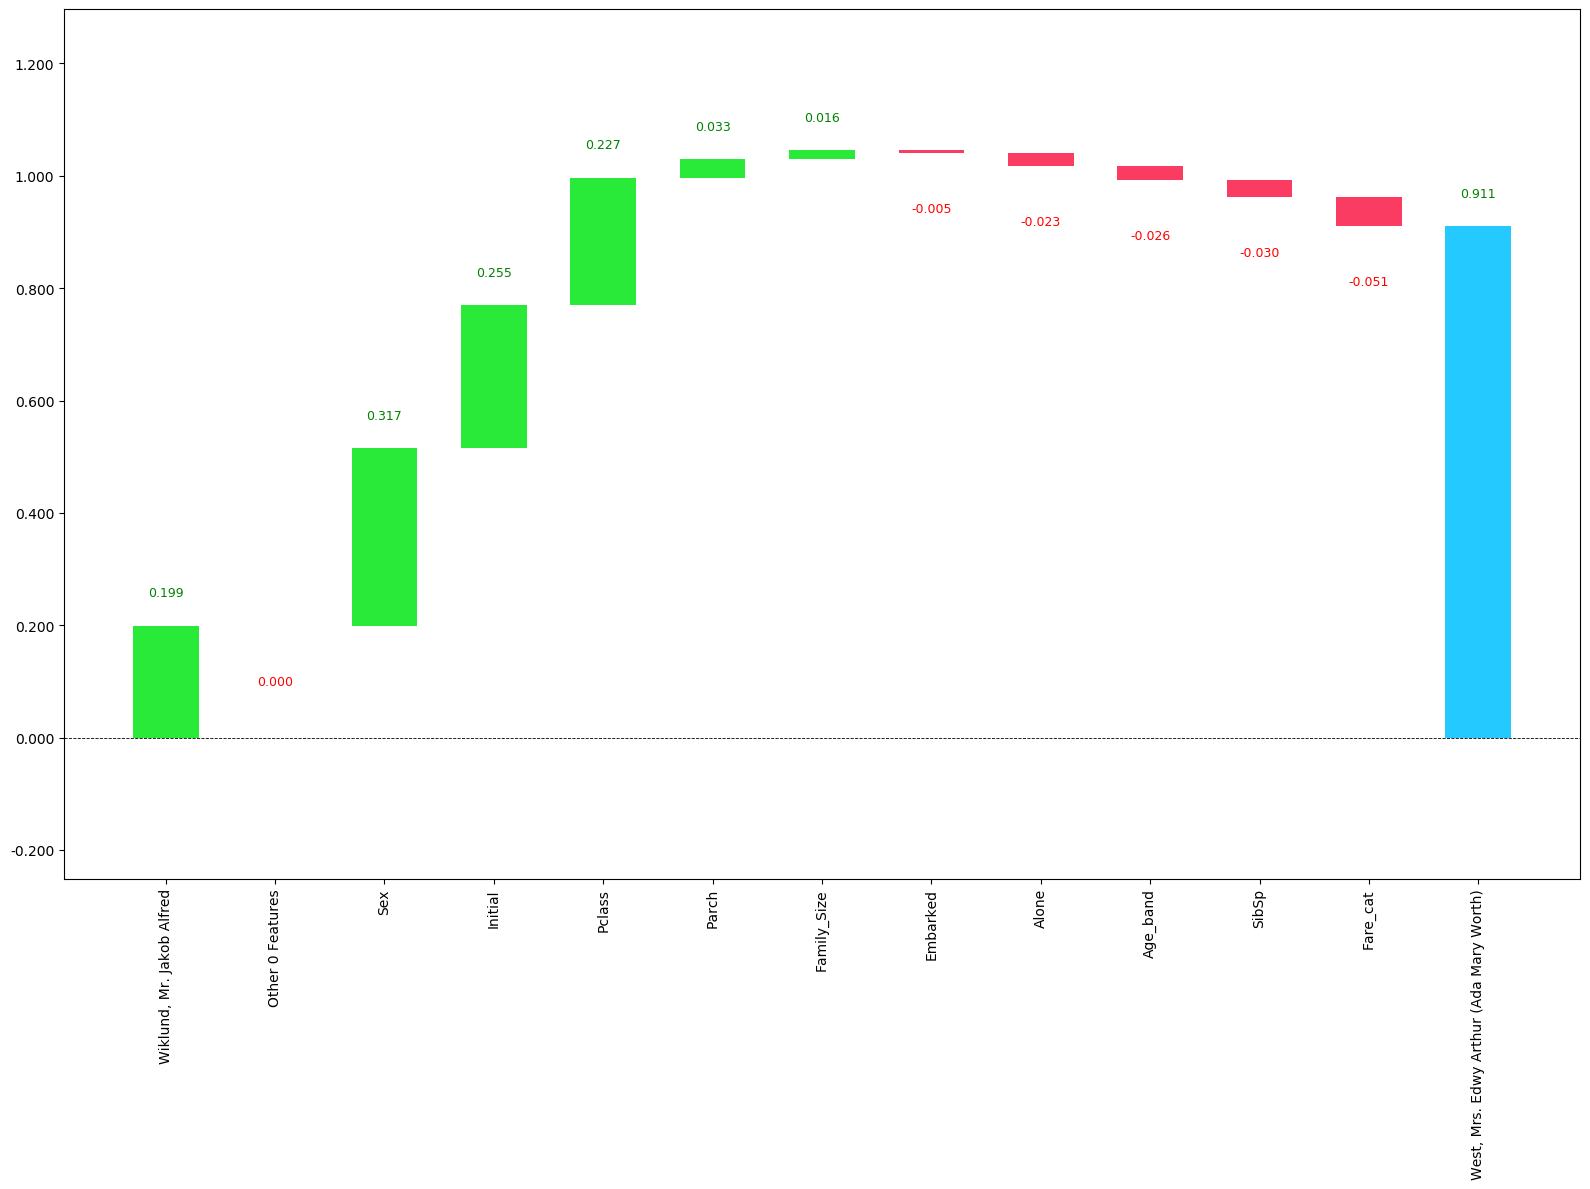

In [45]:
shapwaterfall(model,X_train[sel_cols],X_test[sel_cols+['Reference']],ref1 = 'Wiklund, Mr. Jakob Alfred',ref2 = 'West, Mrs. Edwy Arthur (Ada Mary Worth)', num_feature=10)

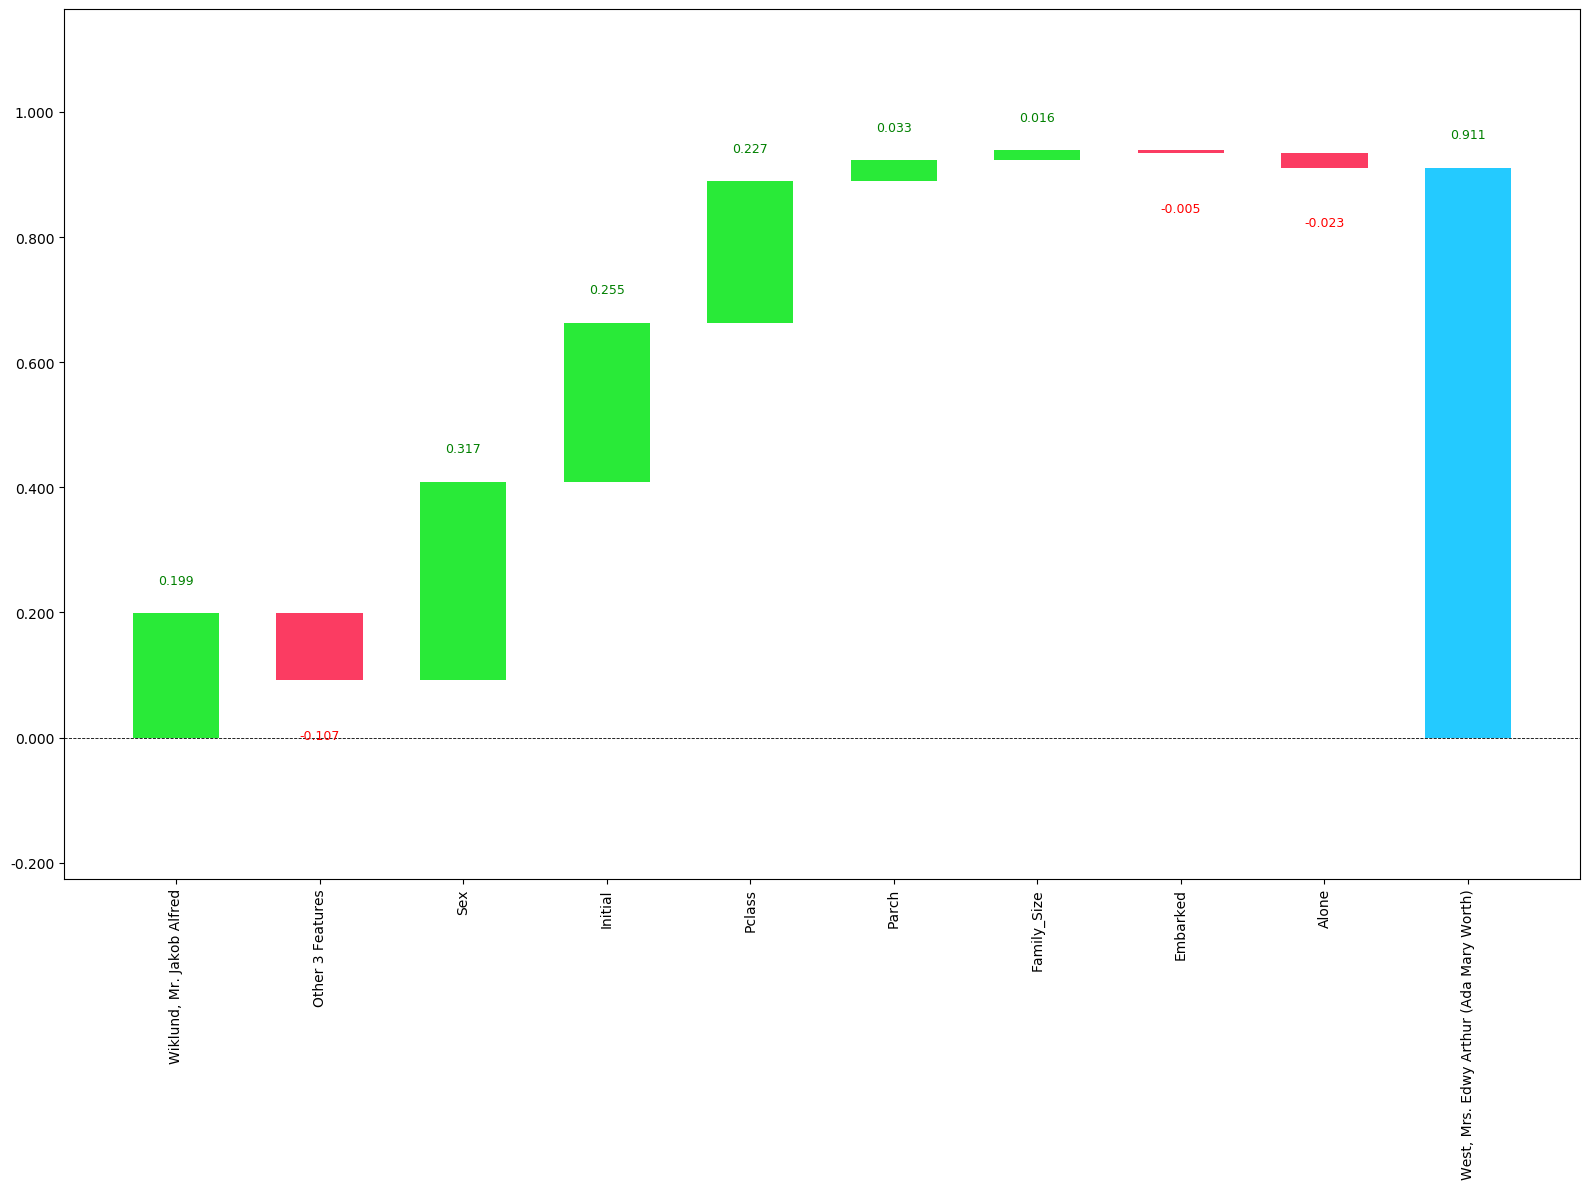

In [46]:
shapwaterfall(model,X_train[sel_cols],X_test[sel_cols+['Reference']],ref1 = 'Wiklund, Mr. Jakob Alfred',ref2 = 'West, Mrs. Edwy Arthur (Ada Mary Worth)', num_feature=7)

In [44]:
X_test[X_test.Reference=='Navratil, Master. Edmond Roger']

,PassengerId,Survived,Pclass,Reference,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
340,341,1,2,"Navratil, Master. Edmond Roger",0,2.0,1,1,230080,26.0,F2,0,3,0,2,0,2


In [32]:
X_test[X_test.Reference=='Sage, Miss. Constance Gladys]

,PassengerId,Survived,Pclass,Reference,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
180,181,0,3,"Sage, Miss. Constance Gladys",1,22.0,8,2,CA. 2343,69.55,NaN,0,2,1,10,0,3


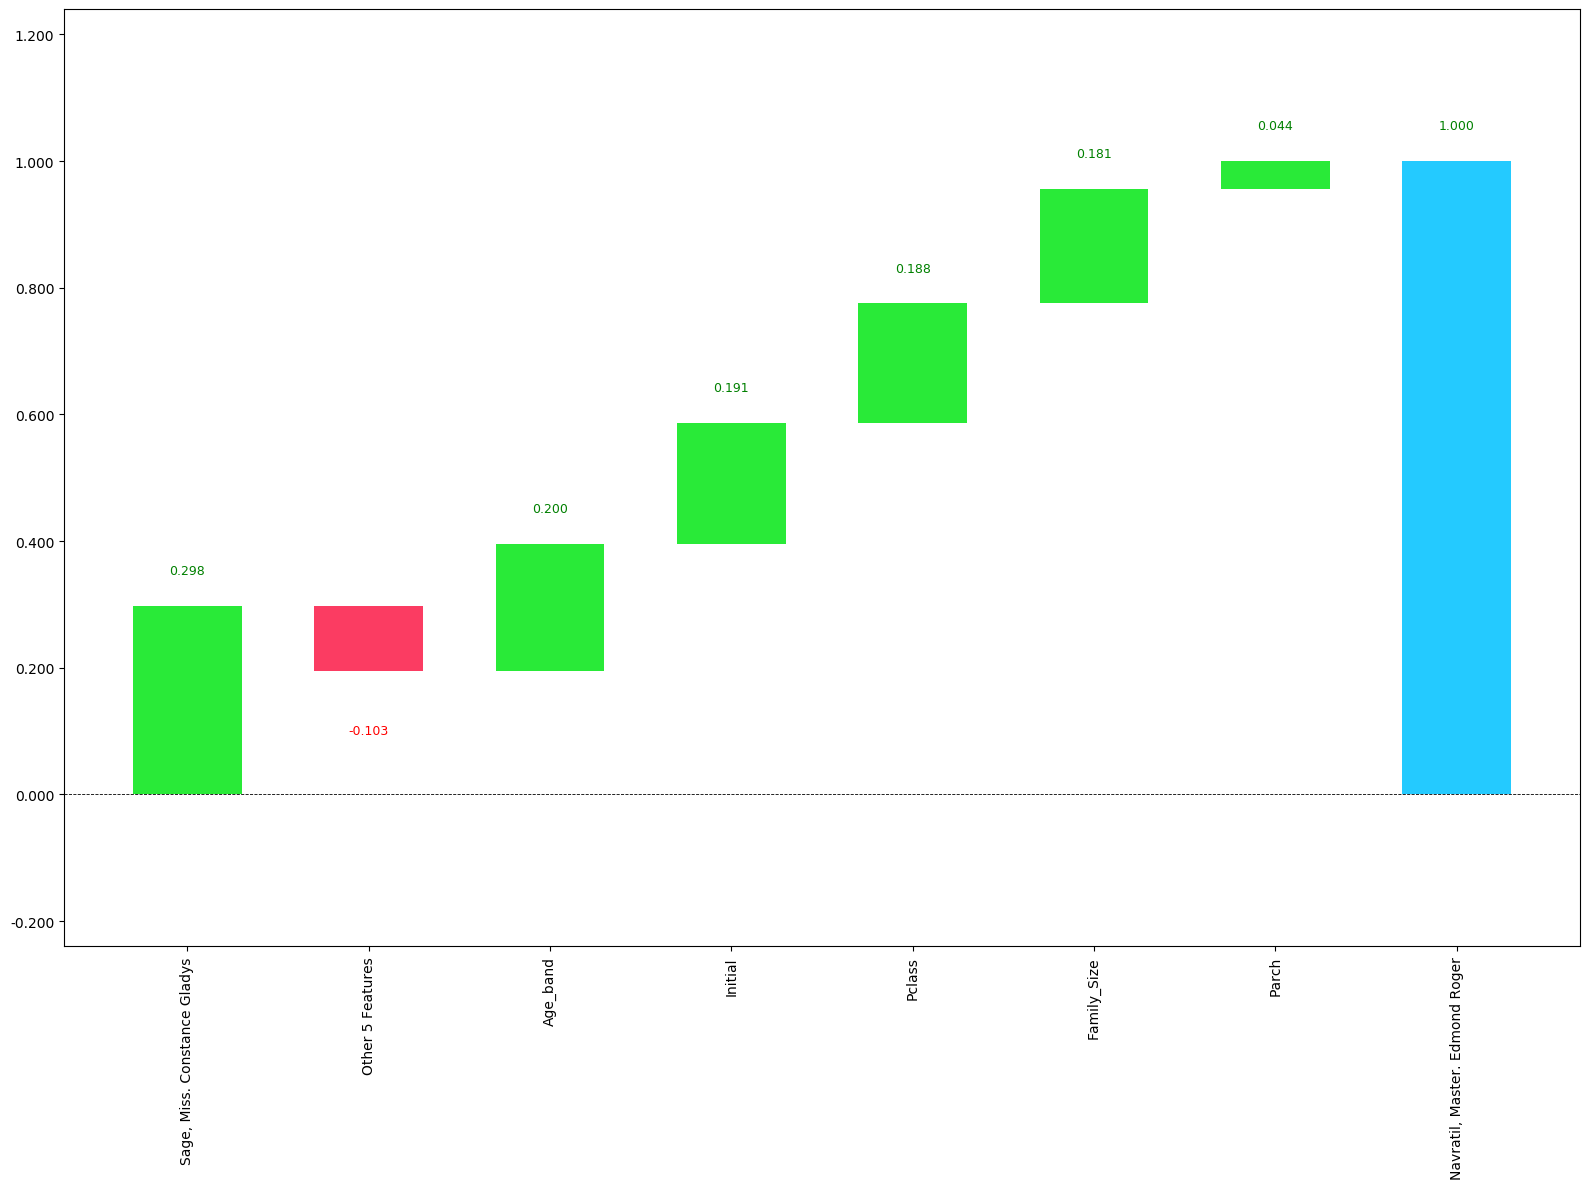

In [47]:
shapwaterfall(model,X_train[sel_cols],X_test[sel_cols+['Reference']],ref1 = 'Navratil, Master. Edmond Roger',ref2 = 'Sage, Miss. Constance Gladys', num_feature=5)

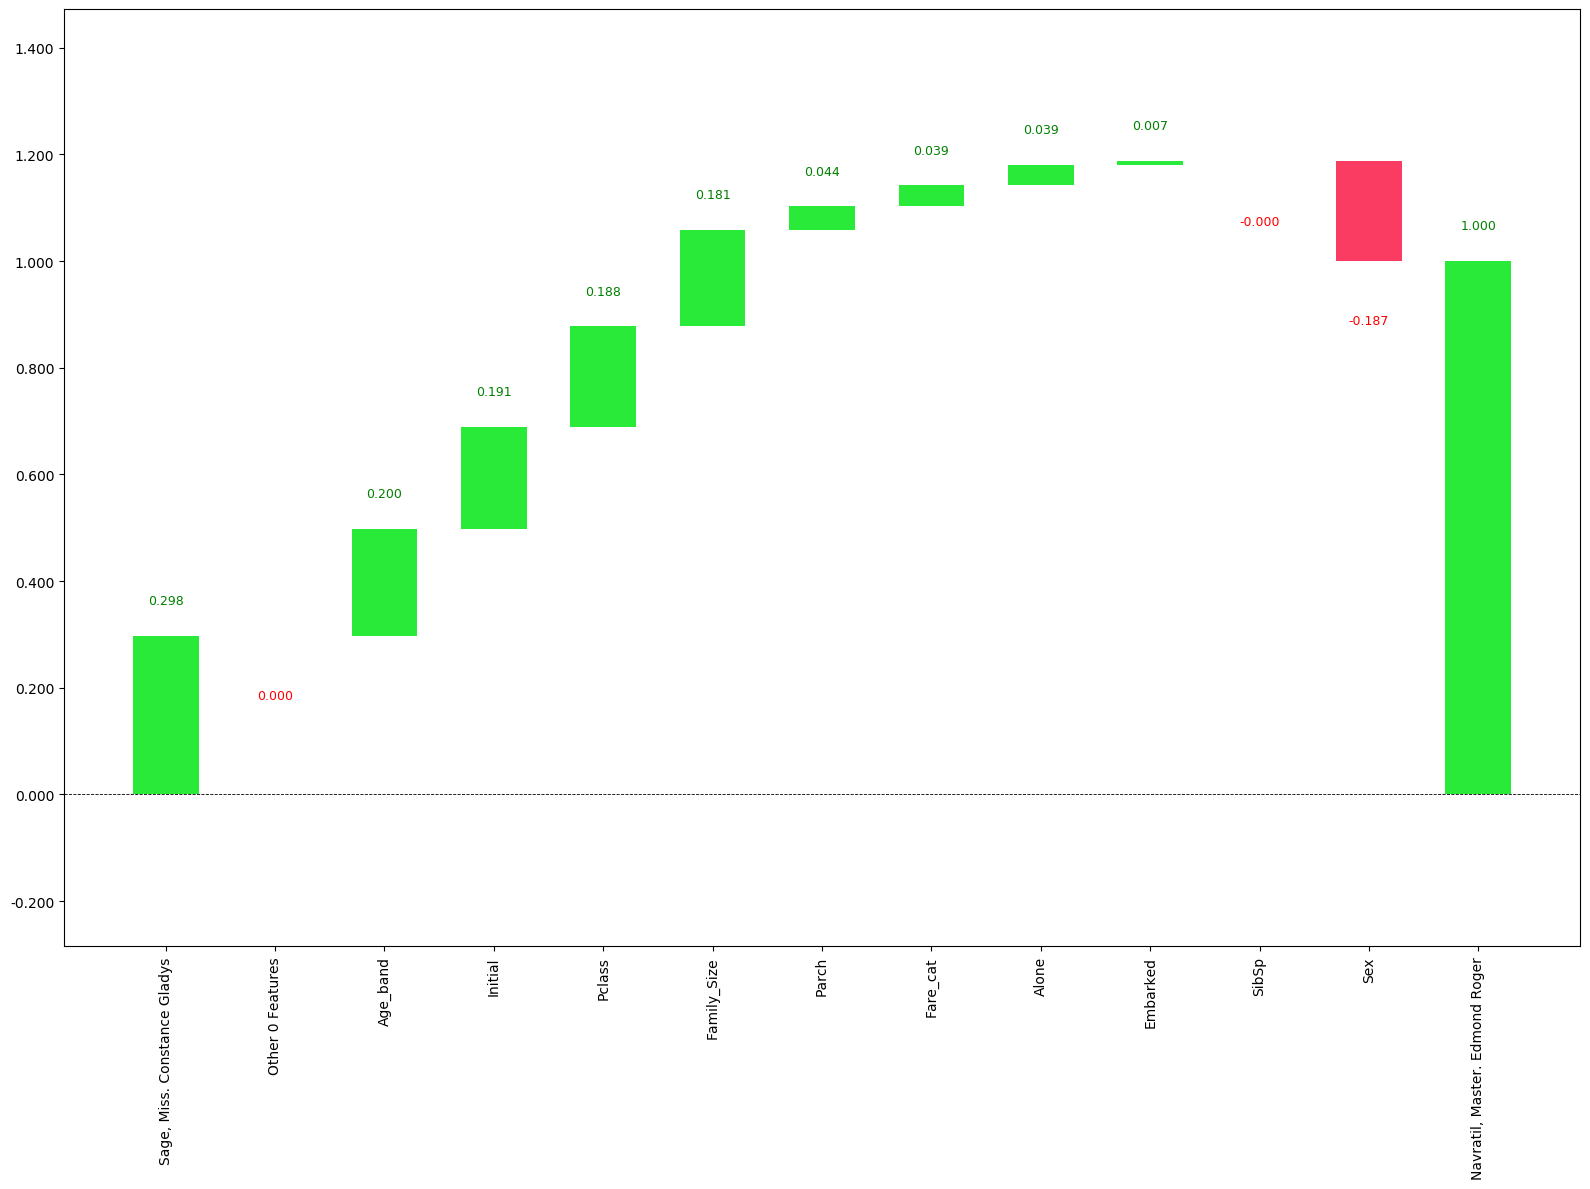

In [48]:
shapwaterfall(model,X_train[sel_cols],X_test[sel_cols+['Reference']],ref1 = 'Navratil, Master. Edmond Roger',ref2 = 'Sage, Miss. Constance Gladys', num_feature=10)

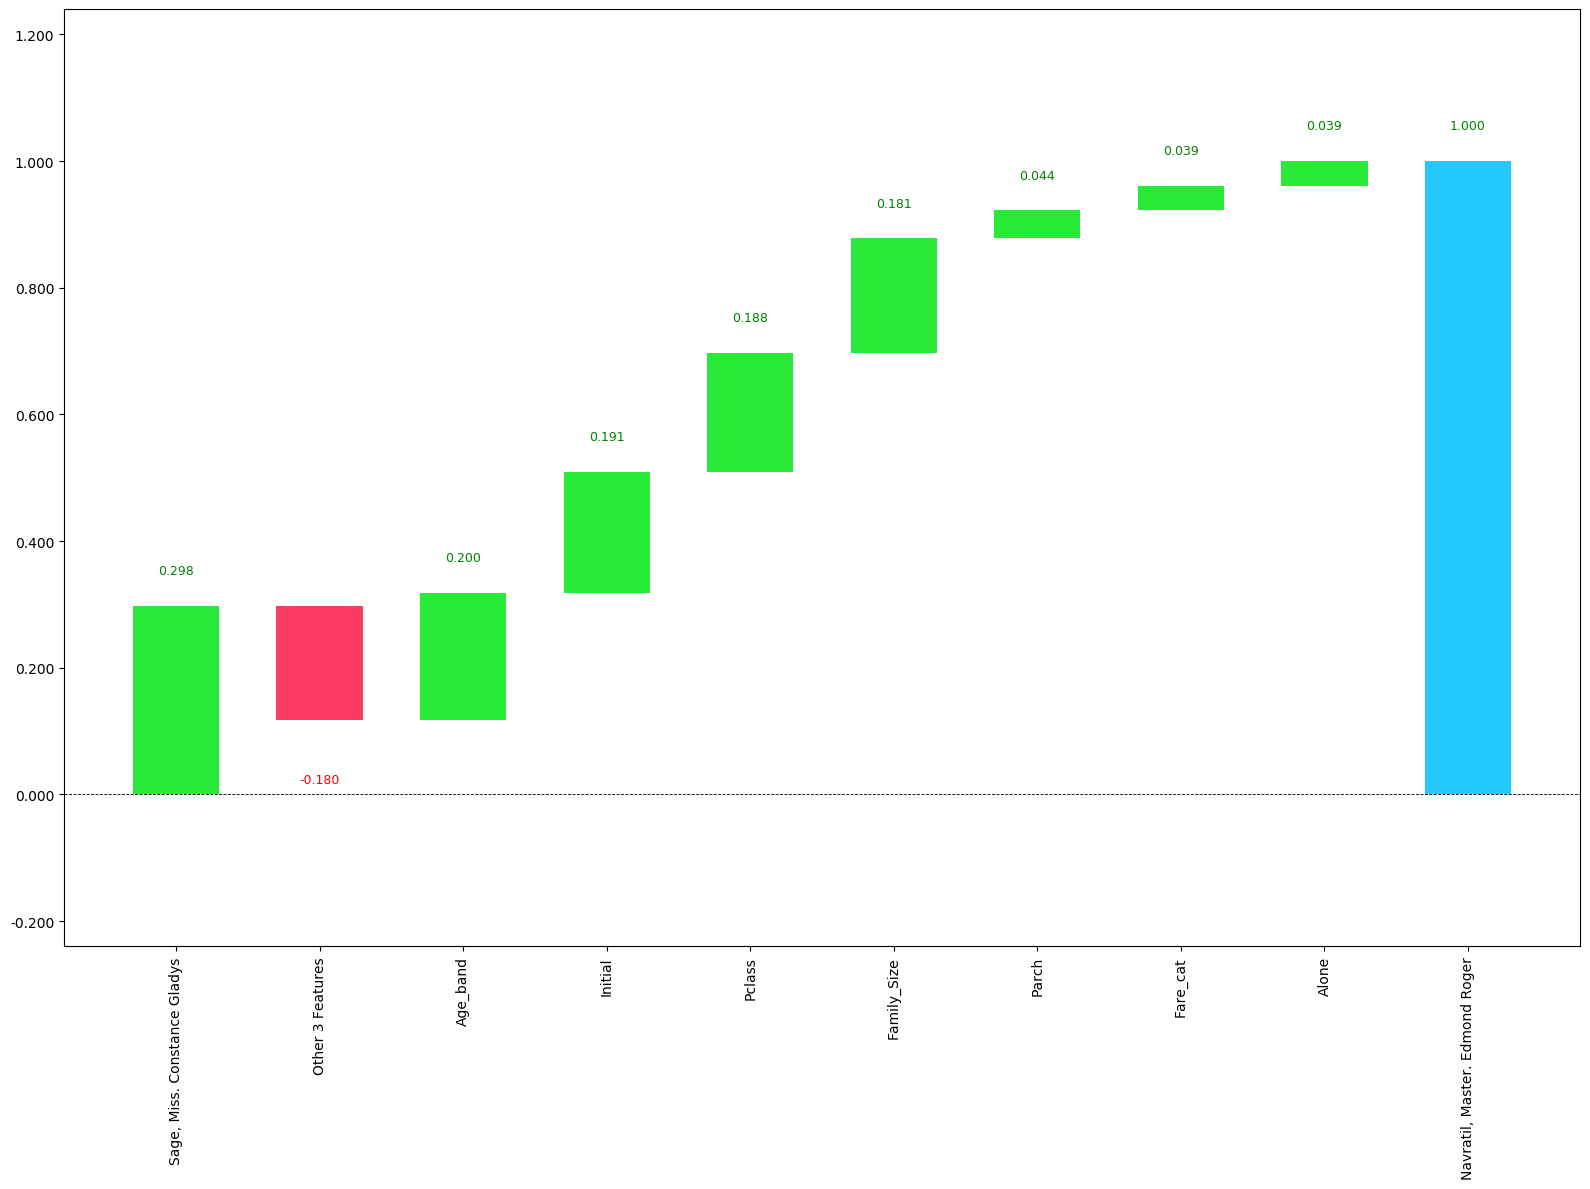

In [49]:
shapwaterfall(model,X_train[sel_cols],X_test[sel_cols+['Reference']],ref1 = 'Navratil, Master. Edmond Roger',ref2 = 'Sage, Miss. Constance Gladys', num_feature=7)